In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr


### Analysing historical returns using dataset from A. Damodaran
Excel file downloaded from https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html and converted into a newer Excel format (xlsx)

In [3]:

df = pd.read_excel(os.getcwd()+"/data/histretsp.xlsx",
    sheet_name='Returns by year',
    header=None,
    nrows=93,
    skiprows=range(0,18),
    usecols=[0,1,2,3,4,5])

c:\ProgramData\Anaconda3\envs\trading\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
df.head()
df.columns =["year","SP500ret","3MTBill","10YUSTBond","BAACorpBond","RealEstate"]
df.set_index("year",inplace=True)


In [5]:
df.tail(5)

,SP500ret,3MTBill,10YUSTBond,BAACorpBond,RealEstate
year,,,,,
2016,0.117731,0.003161,0.006906,0.103651,0.053097
2017,0.216055,0.009341,0.028017,0.097239,0.062131
2018,-0.042269,0.019363,-0.000167,-0.027626,0.045327
2019,0.312117,0.020625,0.096356,0.153295,0.036916
2020,0.180232,0.003547,0.113319,0.104115,0.103461


In [6]:
df['10YUSTBond'].loc['2013':]

year
2013   -0.091046
2014    0.107462
2015    0.012843
2016    0.006906
2017    0.028017
2018   -0.000167
2019    0.096356
2020    0.113319
Name: 10YUSTBond, dtype: float64

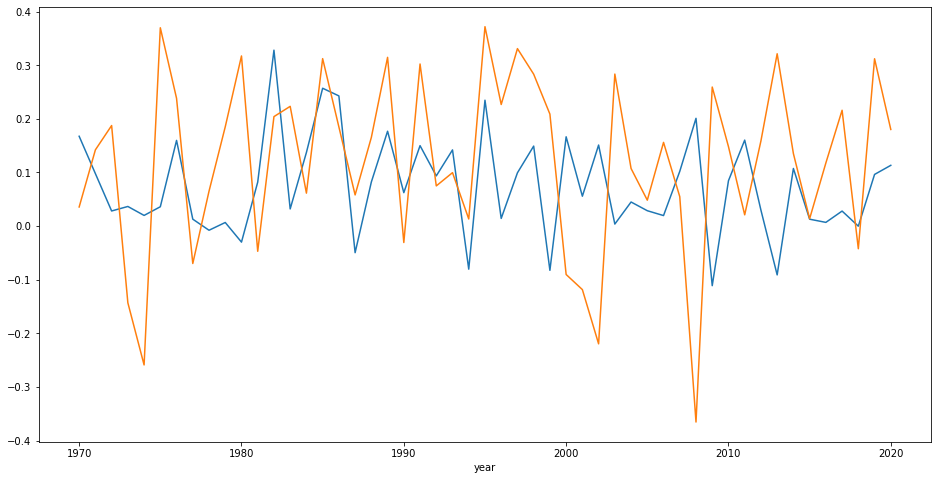

In [7]:
plt.figure(figsize=(16,8))
df['10YUSTBond'].loc['1970':].plot(label='10 Year US Treasure Bond')
df['SP500ret'].loc['1970':].plot(label='S&P 500')
ax1 = plt.subplot
plt.show()

Correlation of stocks and interest rates:  -0.6272959641279757


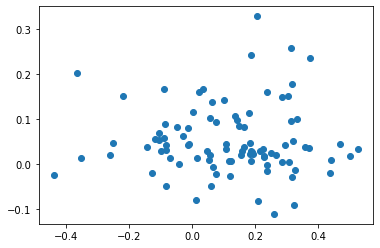

In [8]:
# Compute correlation using corr()
correlation = df['SP500ret'].loc['2000':].corr(df['10YUSTBond'].loc['2000':])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(df['SP500ret'], df['10YUSTBond']);

To test if this correlation is statistically significant, we can calculate the p-value associated with the Pearson correlation coefficient by using the Scipy pearsonr() function, which returns the Pearson correlation coefficient along with the two-tailed p-value.

In [9]:
pearsonr(df['SP500ret'], df['10YUSTBond'])

(-0.011877817793211558, 0.9100303176384162)

The correlation coefficient is -0.0118 and the two-tailed  p-value is .91. Since this p-value is bigger than .05, we would conclude that there is no statistically significant correlation between the two variables.

In [10]:
plt.figure(figsize=(15,10))
df['CumRetSP500'].loc['2000':].plot(label='S&P 500')
df['CumRet10YUSTBond'].loc['2000':].plot(label='10 Year US Treasury Bond')
plt.legend()
plt.show()

KeyError: 'CumRetSP500'

<Figure size 1080x720 with 0 Axes>

### Calculating cumulative returns

In [ ]:
df['CumRetSP500'] = (1 + df['SP500ret']).cumprod()*100
df['CumRet10YUSTBond'] = (1 + df['10YUSTBond']).cumprod()*100